# Estudo dinâmico das mortes por COVID no Brasil

## Preparativos iniciais

### Importando as bibliotecas necessárias

In [1]:
import pandas as pd
from urllib.request import urlretrieve
import matplotlib.pyplot as plt

### Buscando a base de dados mais atualizada

In [2]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
# urlretrieve(url, 'Datasets/covid19_deaths.csv')


In [3]:
df_covid = pd.read_csv(url)

### Fazendo uma análise preliminar da base

In [4]:
df_covid.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '9/11/20', '9/12/20', '9/13/20', '9/14/20', '9/15/20', '9/16/20',
       '9/17/20', '9/18/20', '9/19/20', '9/20/20'],
      dtype='object', length=247)

In [5]:
df_covid.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1420,1420,1420,1425,1426,1436,1436,1437,1437,1441
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,327,330,334,338,340,343,347,353,358,362
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1599,1605,1612,1620,1632,1645,1654,1659,1665,1672
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,131,132,134,136,139,143,144,147,147,152


In [6]:
df_covid.describe().round(2)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20
count,266.00,266.00,266.00,266.00,266.00,266.00,266.00,266.00,266.00,266.00,...,266.00,266.00,266.00,266.00,266.00,266.00,266.00,266.00,266.00,266.00
mean,21.08,22.83,0.06,0.07,0.10,0.16,0.21,0.31,0.49,0.50,...,3441.19,3459.52,3473.21,3489.86,3514.48,3536.11,3556.62,3578.07,3597.74,3611.64
std,24.90,70.19,1.04,1.04,1.47,2.45,3.19,4.66,7.66,7.66,...,16314.67,16398.95,16453.47,16510.26,16636.85,16739.31,16831.54,16934.23,17019.79,17068.31
min,-51.80,-135.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,6.68,-15.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,5.00,5.00,5.25,5.25,5.25,5.25,5.25,5.25,5.25,5.25
50%,22.82,20.92,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,57.00,57.00,57.00,57.00,58.00,59.00,60.50,61.50,62.50,64.00
75%,41.14,77.91,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,582.75,588.00,588.25,611.50,620.50,620.50,622.50,629.00,635.75,645.50
max,71.71,178.06,17.00,17.00,24.00,40.00,52.00,76.00,125.00,125.00,...,192979.00,193693.00,194071.00,194493.00,195781.00,196763.00,197633.00,198570.00,199282.00,199509.00


### Retirando as colunas 'Lat' e 'Long' da base

In [7]:
df_covid.drop(['Lat', 'Long'], axis=1, inplace=True)

### Agrupando a base por 'Country/Region'

É necessário fazer este agrupamento, pois alguns países são divididos por províncias na base original

In [8]:
df_country = df_covid.groupby('Country/Region').sum()

### Filtrando somente o Brasil, para o nosso estudo

In [9]:
df_country.loc['Brazil']

1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         0
            ...  
9/16/20    134106
9/17/20    134935
9/18/20    135793
9/19/20    136532
9/20/20    136895
Name: Brazil, Length: 243, dtype: int64

In [10]:
s_brazil = df_country.loc['Brazil']

### Expurgando os dias sem mortes da análise

In [11]:
s_brasil = s_brazil[s_brazil > 0]

# Resultados da análise

## Evolução das mortes acumuladas

Text(0.5, 1.0, 'Total de mortes acumuladas por COVID-19 no Brasil')

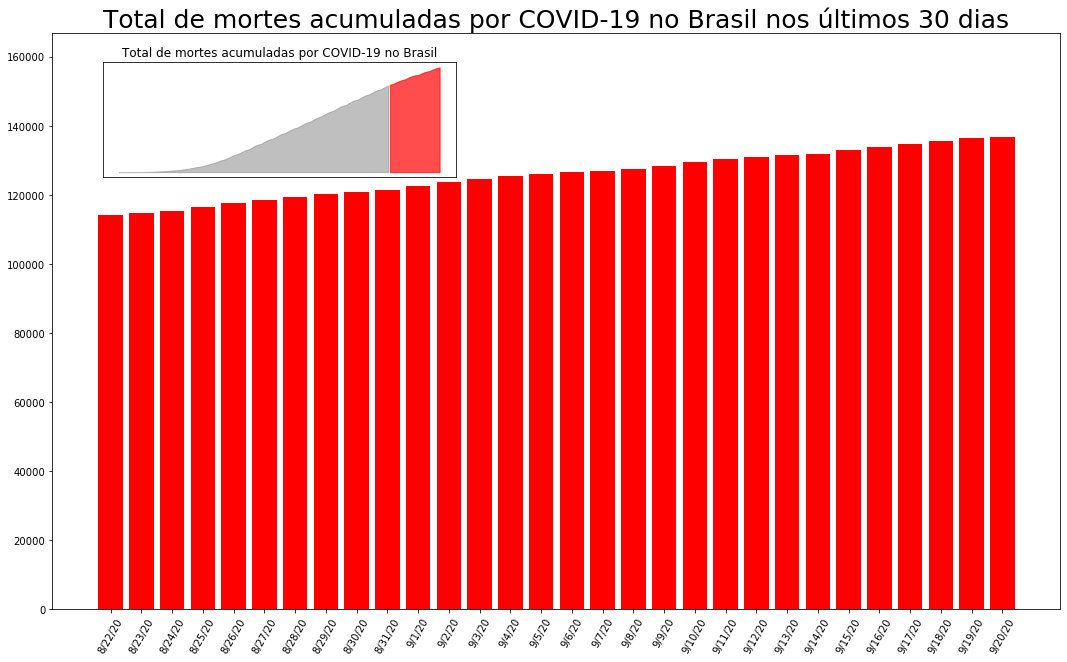

In [12]:
area = plt.figure(figsize=(14,8))
eixo = area.add_axes([0,0,1,1])
eixo2 = area.add_axes([0.05,.75,.35,.2])

eixo.set_title('Total de mortes acumuladas por COVID-19 no Brasil nos últimos 30 dias', fontsize=25)
eixo.bar(s_brasil.index[-30:], s_brasil.values[-30:],color=(1,0,0,1))
eixo.set_ylim((0,s_brasil.max()+30000))
eixo.set_xticklabels(s_brasil.index[-30:], rotation=60)

eixo2.fill_between(s_brasil.index[:-30], s_brasil.values[:-30], color=(.5,.5,.5,.5))
eixo2.fill_between(s_brasil.index[-30:], s_brasil.values[-30:], color=(1,0,0,.7))
eixo2.get_xaxis().set_ticks([])
eixo2.get_yaxis().set_ticks([])
eixo2.set_title('Total de mortes acumuladas por COVID-19 no Brasil')

## Comportamento das mortes diárias

### Calculando as mortes diárias a partir da base que estamos utlizando

In [13]:
mortes_diarias = s_brasil - s_brasil.shift(1)
mortes_diarias = mortes_diarias.reset_index()
mortes_diarias.dropna(inplace=True)

### Plotando as mortes diárias e a média nos últimos 60 dias

Text(0.5, 1.0, 'Mortes diárias por COVID-19 no Brasil')

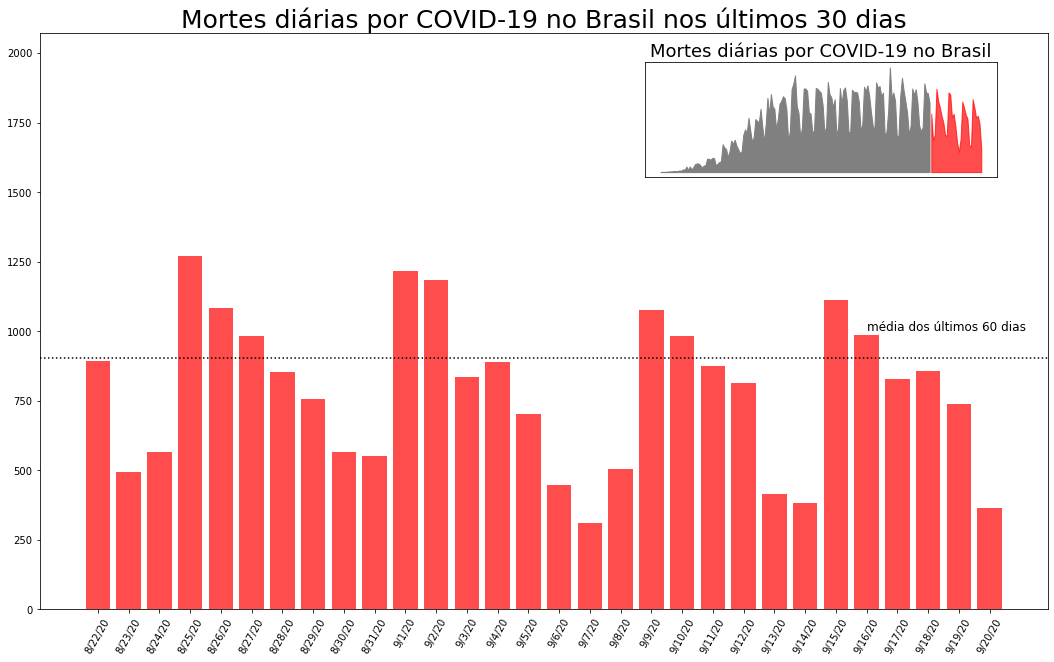

In [14]:
area = plt.figure(figsize=(14,8))
eixo = area.add_axes([0,0,1,1])
eixo2 = area.add_axes([0.6,.75,.35,.2])

media = mortes_diarias['Brazil'][-60:].mean()

eixo.set_title('Mortes diárias por COVID-19 no Brasil nos últimos 30 dias', fontsize=25)
eixo.bar(mortes_diarias['index'][-30:], mortes_diarias['Brazil'][-30:], color=(1,0,0,.7))
eixo.set_ylim((0,mortes_diarias['Brazil'][-30:].max()+800))
eixo.set_xticklabels(labels=mortes_diarias['index'][-30:],rotation=60)
eixo.axhline(media, color='k', linestyle=':')
eixo.annotate('média dos últimos 60 dias', xy=(25, media+100), fontsize=12)

eixo2.fill_between(mortes_diarias['index'][:-30], mortes_diarias['Brazil'][:-30], color=(.5,0.5,0.5,1))
eixo2.fill_between(mortes_diarias['index'][-30:], mortes_diarias['Brazil'][-30:], color=(1,0,0,.7))
eixo2.get_xaxis().set_ticks([])
eixo2.get_yaxis().set_ticks([])
eixo2.set_title('Mortes diárias por COVID-19 no Brasil', fontsize=18)

## Análise das médias móveis com janela de 7 dias

### Calculando as médias móveis a partir dos mortes diárias

Escolhi a janela de 7 dias para tentar amortecer o efeito serrilhado dos finais de semana, onde muitos dados deixam de ser reportados.

In [15]:
medias_moveis_diarias = mortes_diarias.rolling(7).mean()
medias_moveis_diarias.dropna(inplace=True)
medias_moveis_diarias = medias_moveis_diarias.reset_index()

### Plotando o comportamento das médias móveis

Text(0.5, 1.0, 'Média móvel das mortes por COVID-19 no Brasil')

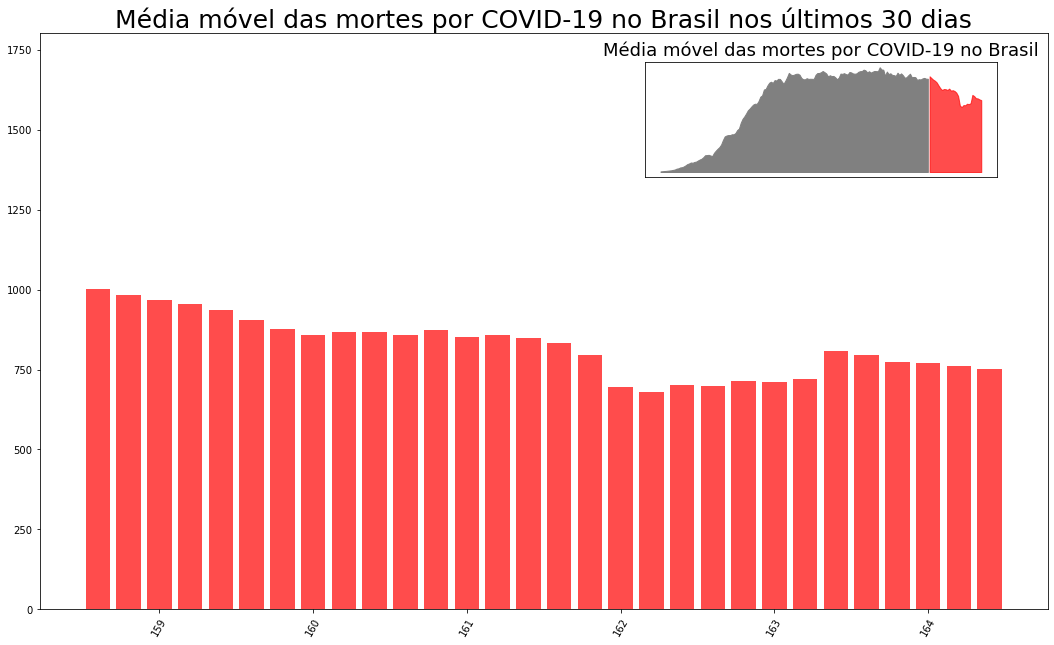

In [16]:
area = plt.figure(figsize=(14,8))
eixo = area.add_axes([0,0,1,1])
eixo2 = area.add_axes([0.6,.75,.35,.2])


eixo.set_title('Média móvel das mortes por COVID-19 no Brasil nos últimos 30 dias', fontsize=25)
eixo.bar(medias_moveis_diarias['index'][-30:], medias_moveis_diarias['Brazil'][-30:], color=(1,0,0,.7))
eixo.set_ylim((0,medias_moveis_diarias['Brazil'][-30:].max()+800))
eixo.set_xticklabels(labels=medias_moveis_diarias['index'][-30:],rotation=60)

eixo2.fill_between(medias_moveis_diarias['index'][:-30], 0, medias_moveis_diarias['Brazil'][:-30], color=(.5,0.5,0.5,1))
eixo2.fill_between(medias_moveis_diarias['index'][-30:], medias_moveis_diarias['Brazil'][-30:], color=(1,0,0,.7))
eixo2.get_xaxis().set_ticks([])
eixo2.get_yaxis().set_ticks([])
eixo2.set_title('Média móvel das mortes por COVID-19 no Brasil', fontsize=18)